现在假设我们想知道一个学校学生的平均智商，从这个学校抽取5个学生（样本），测量智商为90,100,105,145和100，现在要估计整个学校（总体）的平均智商。为了让估计尽可能准确，我们应该怎么做？

- A. 使用5个学生的智商的中位数
- B. 使用5个学生的智商的平均值
- C. 使用5个学生的智商的（最小值+最大值）/2
- D. 从5个学生中去除最大值，去除最小值，剩下的智商数除以2

In [33]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy

In [34]:
def drawLine(vFrom, vTo, value,color='red',isHori=False):
    if isHori:
         plt.plot([vFrom,vTo],[value,value],color)
    else:
         plt.plot([value,value],[vFrom,vTo],color)

In [35]:
populationN = 100000
pops = {
    'randint':np.random.randint(1,100,populationN),
    'normal':np.random.normal(138,15,populationN),
    'chisq1':np.random.chisquare(1,populationN),
    'chisq2':np.random.chisquare(2,populationN),
    'chisq4':np.random.chisquare(4,populationN),
    'chisq4-':np.random.chisquare(4,populationN)*-1,
    'chisq20':np.random.chisquare(20,populationN),
}

总体分布


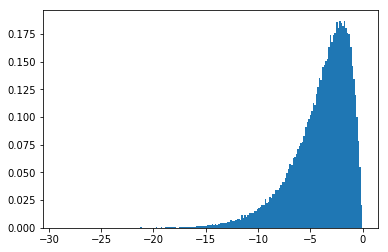

样本中值分布规律


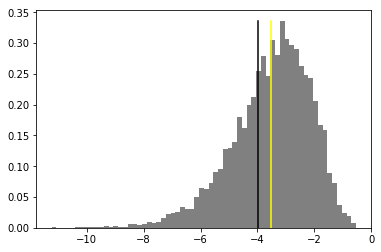

样本平均值分布


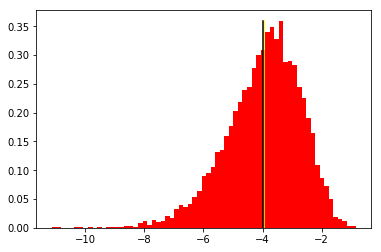

样本最大+最小值除以2分布


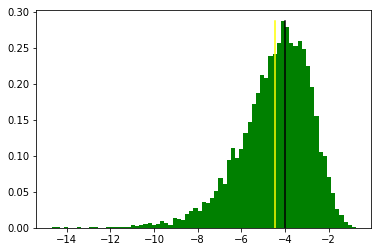

去掉最大值，去掉最小值以后的平均值分布


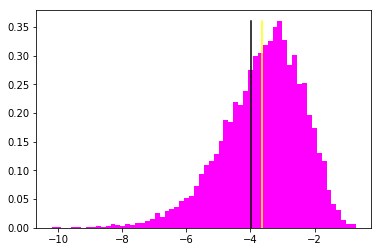

In [57]:
pop1 = pops['chisq4-']
mean_pop1 = np.mean(pop1)
median_pop1=np.median(pop1)
std_pop1 = np.std(pop1)
iteration = 10000
sample_size = 5
print("总体分布")
pop_hist = plt.hist(pop1,'auto',density=1)
plt.show()

median_sample = []
mean_sample = []
max_min_sample = []
mean_in_between_sample = []


scatter_median_sample = []
scatter_mean_sample = []
scatter_max_min_sample = []
scatter_mean_in_between_sample = []
# 散点图的统计计算方式？
scatter_calc_method = np.mean

for i in range(iteration):
    sample = np.random.choice(pop1,sample_size)
    mean_sample.append(np.mean(sample))
    median_sample.append(np.median(sample))
    max_min_sample.append((sample.max()+sample.min())/2)
    mean_in_between_sample.append((np.mean([e for e in sample if e != np.max(sample) and e != np.min(sample)])))
    scatter_median_sample.append((i,scatter_calc_method(median_sample)))
    scatter_mean_sample.append((i,scatter_calc_method(mean_sample)))
    scatter_max_min_sample.append((i,scatter_calc_method(max_min_sample)))
    scatter_mean_in_between_sample.append((i,scatter_calc_method(mean_in_between_sample)))
    

def histWithPopAndSampleMean(sample,pop_mean,color):
    count,bins,ignored = plt.hist(sample,'auto',density = 1, color=color)
    drawLine(0,count.max(),scatter_calc_method(sample),color='yellow')
    drawLine(0,count.max(),pop_mean,color='black')
    plt.show()
print("样本中值分布规律")   
histWithPopAndSampleMean(median_sample,mean_pop1,'grey')
print("样本平均值分布")
histWithPopAndSampleMean(mean_sample,mean_pop1,'red')
print("样本最大+最小值除以2分布")
histWithPopAndSampleMean(max_min_sample,mean_pop1,'green')
print("去掉最大值，去掉最小值以后的平均值分布")
histWithPopAndSampleMean(mean_in_between_sample,mean_pop1,'magenta')

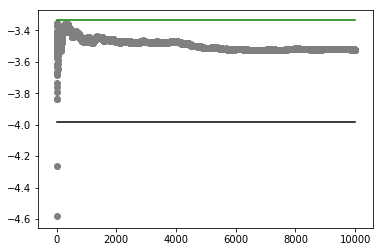

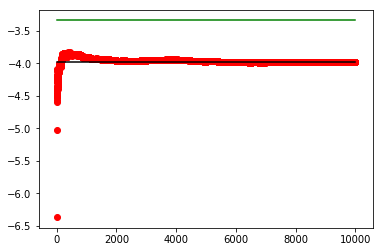

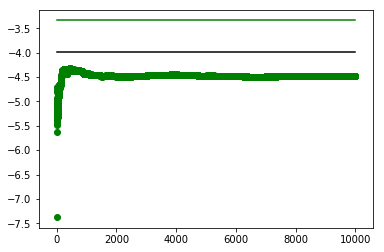

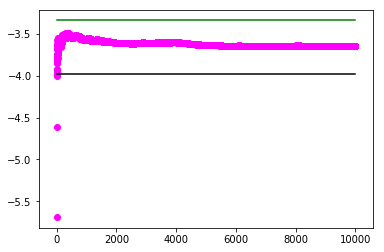

In [46]:
def flunctuatePlot(scatters,reference,color):
    x_scatters,y_scatters = zip(*scatters)
    drawLine(0,iteration,reference[0],color='black',isHori=True)
    drawLine(0,iteration,reference[1],color='green',isHori=True)
    plt.scatter(x_scatters,y_scatters,color=color)
    plt.show()
reference = [mean_pop1,median_pop1]  
flunctuatePlot(scatter_median_sample,reference,'grey')
flunctuatePlot(scatter_mean_sample,reference,'red')
flunctuatePlot(scatter_max_min_sample,reference,'green')
flunctuatePlot(scatter_mean_in_between_sample,reference,'magenta')

$E(x)=\mu$



估计定理. 1：样本均值的期望值就是总体的均值

那么标准差呢？

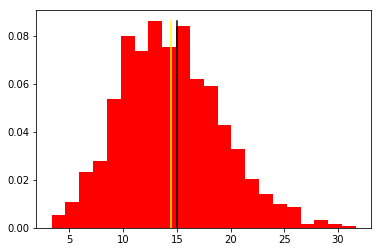

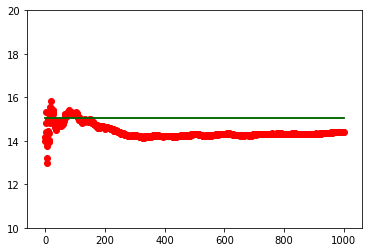

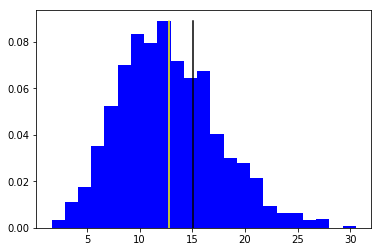

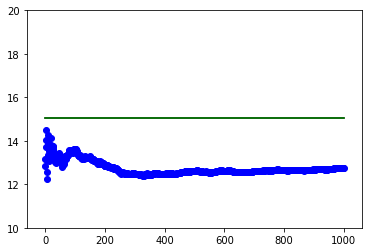

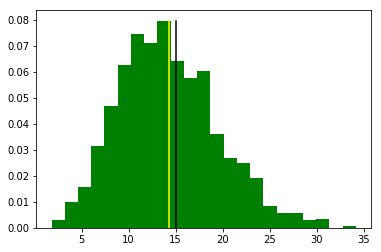

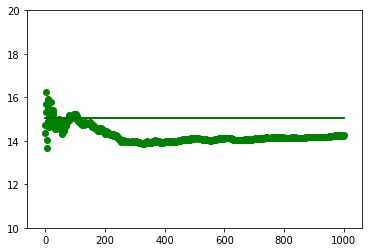

In [72]:
std_sample = []
scatter_std_sample = []
std_small_sample = []
scatter_std_small_sample = []
std_mod_sample = []
scatter_std_mod_sample=[]

pop_iq = pops["normal"]
mean_pop_iq = np.mean(pop_iq)
std_pop_iq = np.std(pop_iq)
sample_size = 5
iteration = 1000

def x_minus_mu_std(x,mu):
    return math.sqrt(np.sum((x-mu)*(x-mu))/len(x))
def x_minus_mean_std(x):
    return math.sqrt(np.sum((x-np.mean(x))*(x-np.mean(x)))/len(x))
def x_minus_mean_mod_std(x):
    return math.sqrt(np.sum((x-np.mean(x))*(x-np.mean(x)))/(len(x)-1))
# a = np.array([90,100,105,145,100])
# print(x_minus_mu_std(a,138))

for i in range(iteration):
    sample = np.random.choice(pop_iq,sample_size)
    std_sample.append(x_minus_mu_std(sample,mean_pop_iq))
    scatter_std_sample.append((i,np.mean(std_sample)))
    std_small_sample.append(x_minus_mean_std(sample))
    scatter_std_small_sample.append((i,np.mean(std_small_sample)))
    std_mod_sample.append(x_minus_mean_mod_std(sample))
    scatter_std_mod_sample.append((i,np.mean(std_mod_sample)))

histWithPopAndSampleMean(std_sample,std_pop_iq,'red')
plt.ylim(10,20)  
flunctuatePlot(scatter_std_sample,[std_pop_iq,std_pop_iq],"red")
histWithPopAndSampleMean(std_small_sample,std_pop_iq,'blue')
plt.ylim(10,20)  
flunctuatePlot(scatter_std_small_sample,[std_pop_iq,std_pop_iq],"blue")
histWithPopAndSampleMean(std_mod_sample,std_pop_iq,'green')
plt.ylim(10,20)  
flunctuatePlot(scatter_std_mod_sample,[std_pop_iq,std_pop_iq],"green")